In [1]:
# 기본 패키지 추가
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import scipy as sp 
import matplotlib as mpl

import statsmodels.api as sm 
import sklearn as sk

from matplotlib import rc
import matplotlib.font_manager as fm 

plt.rcParams['font.family']=['NanumSquareRoundR.ttf']
plt.rcParams['font.size']=14
# plt.rc('font', family ='NanumSquareRoundR')
sns.set(font = 'Malgun Gothic' ,rc={'axes.unicode_minus':False}, style='darkgrid')

#### 농어데이터준비

In [32]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


##### 훈련세트,테스트세트 분리

In [34]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)

In [35]:
# 훈련세트 / 테스트세트 입력값 2차원으로 변경

new_train_input = np.row_stack((train_input))
new_train_input.shape

(42, 1)

In [36]:
new_test_input = np.row_stack((test_input))
new_test_input.shape

(14, 1)

##### 모델훈련

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)


In [38]:
knr.fit(X=new_train_input,y=train_target)

KNeighborsRegressor(n_neighbors=3)

In [39]:
# 결정계수 확인
knr.score(X=new_train_input,y=train_target)

0.9804899950518966

In [40]:
knr.score(X=new_test_input,y=test_target)

0.9746459963987609

In [41]:
#길이 50 무게 얼마 ?
knr.predict([[50.0]])[0]

1033.3333333333333

#### 무게가 1500g 되어야 하는데?
- ML모델이 잘못된건가

##### 훈련세트 산점도

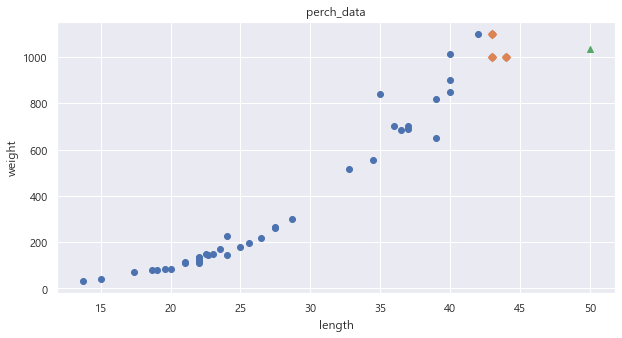

In [42]:
#길이50cm 농어에 대한 이웃값3개
dist,inds = knr.kneighbors([[50.0]])
plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input,y=train_target)
plt.scatter(x=new_train_input[inds],y=train_target[inds],marker='D')
plt.scatter(x=50,y=knr.predict([[50.0]])[0],marker='^')
plt.title('perch_data')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

##### neighbors=3 : mean

In [44]:
np.mean(train_target[inds])

1033.3333333333333

In [47]:
#길이 100cm인데 무게가 1033
knr.predict(X=[[100]])

array([1033.33333333])

#### 선형회귀 Linear Regression
- 가장 대표적인 회귀 알고리즘

In [48]:
# 이제 KNN 안하고 linearregression 호출
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [49]:
# 선형회귀 모델로 훈련
lr.fit(X=new_train_input,y=train_target)

LinearRegression()

In [51]:
lr.score(X=new_train_input,y=train_target)
#훈련데이터로 결정계수 확인

0.9398463339976041

In [52]:
lr.score(X=new_test_input,y=test_target)

0.824750312331356

In [54]:
#50cm predict

lr.predict([[50.0]])

# KNN : 1033.33 , LR : 1241.83

array([1241.83860323])

In [55]:
# 1차방정식의 값을 도출
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


- coef : 상관계수 값  = 가중치(weight)
- intercept : 절편 = 잔차(error)

#### Linear Regression Scatter

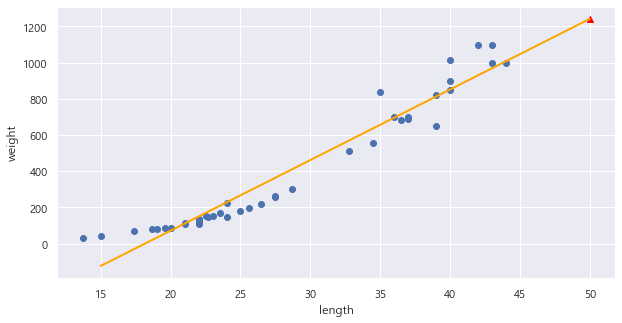

In [63]:
plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input,y=train_target)
plt.scatter(x=50, y=lr.predict([[50]]),marker='^',color='red')

#1차방정식
plt.plot([15,50],[15*lr.coef_ + lr.intercept_, 50*lr.coef_+ lr.intercept_],color='orange',linewidth='2.0')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### 다항회귀

In [65]:
train_poly = np.column_stack((new_train_input**2, new_train_input))
train_poly.shape

(42, 2)

In [67]:
test_poly = np.column_stack((new_test_input**2,new_test_input))
test_poly.shape

(14, 2)

In [69]:
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [70]:
lr = LinearRegression()
lr.fit(X=train_poly,y=train_target)

LinearRegression()

In [71]:
#훈련데이터로 결정계수 확인
lr.score(X=train_poly,y=train_target)

0.9706807451768623

In [72]:
#테스트데이터 결정계수 확인
lr.score(X=test_poly,y=test_target)

0.9775935108325122

In [77]:
# 길이 50cm 농어 무게 예측
# 길이의 제곱값, 길이값 두개로 바꿨으니 두개 해줘야해 
lr.predict([[50.0**2,50.0]])
# 농어의 무게 예측 = 1573.98

array([1573.98423528])

In [79]:
# a*길이제곱 + b+길이+c 
# a=1.0143, b= -21.5579, c=116.0502
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278264


In [86]:
lr.coef_[0]

1.0143321093767301

In [87]:
lr.coef_[1]

-21.55792497883735

In [88]:
lr.intercept_

116.05021078278264

#### 다항 회귀산점도

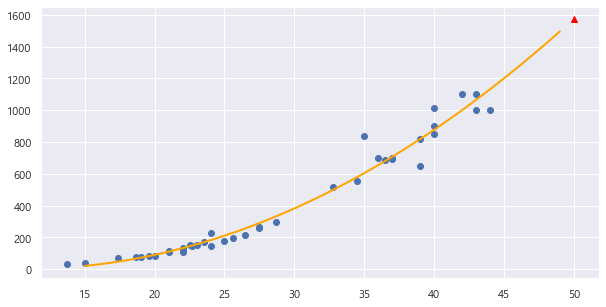

In [89]:
point = np.arange(15,50)
plt.figure(figsize=(10,5))
plt.scatter(x=new_train_input,y=train_target)

#15~49 2차 방정식 그리기
plt.plot(point,lr.coef_[0]*(point**2)+lr.coef_[1]*point+lr.intercept_,color='orange',linewidth='2.0')
plt.scatter(x=[50.0],y=lr.predict([[50.0**2,50.0]]),marker='^',color='red')
plt.show()
